# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')
!pip install neattext
import neattext.functions as nfx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.4 MB/s eta 0:00:00


In [17]:
import seaborn as sns 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

# Reading Data

In [3]:

data = pd.read_csv('/kaggle/input/breast-cancer-classification/wdbc.data')

selected_features = data.iloc[:, :6]  # Selects the first 6 columns
selected_features.columns = ['ID','Diagnosis','radius1','texture1','perimeter1','area1']
print(selected_features)


           ID Diagnosis  radius1  texture1  perimeter1   area1
0      842517         M    20.57     17.77      132.90  1326.0
1    84300903         M    19.69     21.25      130.00  1203.0
2    84348301         M    11.42     20.38       77.58   386.1
3    84358402         M    20.29     14.34      135.10  1297.0
4      843786         M    12.45     15.70       82.57   477.1
..        ...       ...      ...       ...         ...     ...
563    926424         M    21.56     22.39      142.00  1479.0
564    926682         M    20.13     28.25      131.20  1261.0
565    926954         M    16.60     28.08      108.30   858.1
566    927241         M    20.60     29.33      140.10  1265.0
567     92751         B     7.76     24.54       47.92   181.0

[568 rows x 6 columns]


# Data Exploration

In [4]:
selected_features['Diagnosis'].value_counts()

Diagnosis
B    357
M    211
Name: count, dtype: int64

In [5]:
selected_features['Diagnosis'].value_counts().index.values

array(['B', 'M'], dtype=object)

In [6]:
selected_features.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1'], dtype='object')

In [7]:
selected_features.shape

(568, 6)

In [8]:
selected_features['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

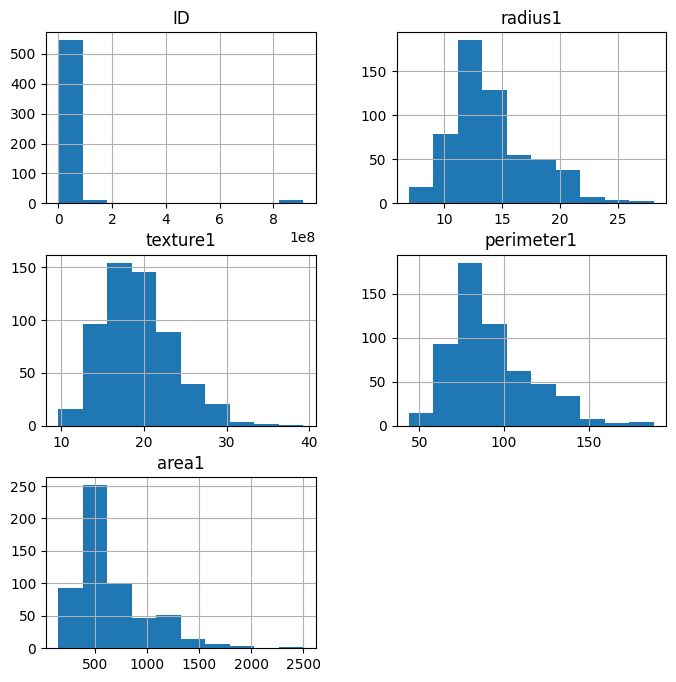

In [9]:
selected_features.hist(figsize=(8,8),)
plt.show()

# Data visualizations

Text(0, 0.5, 'Diagnosis')

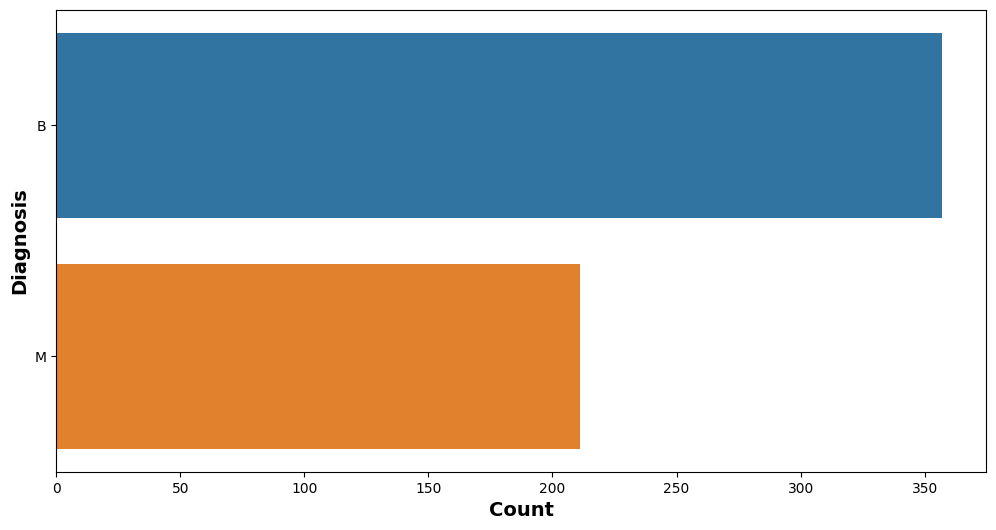

In [10]:
plt.figure(figsize=(12,6))
counts = selected_features['Diagnosis'].value_counts()
sns.barplot(x=counts, y=counts.index)  
plt.xlabel('Count',fontsize=14, fontweight='bold')
plt.ylabel('Diagnosis',fontsize=14, fontweight='bold')

# Creating train and test dataset

In [14]:
X = selected_features.drop("Diagnosis", axis=1)
y = selected_features["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [20]:
reg_model = LogisticRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [22]:
# Evaluate the model on the testing data
accuracy = reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)  

Accuracy: 0.8421052631578947


In [24]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [25]:
evaluate(y_test,y_pred)

Accuracy 0.8421052631578947
Classification Report               precision    recall  f1-score   support

           B       0.82      0.94      0.88        68
           M       0.89      0.70      0.78        46

    accuracy                           0.84       114
   macro avg       0.85      0.82      0.83       114
weighted avg       0.85      0.84      0.84       114

Precision 0.8547008547008547
Recall 0.8184143222506394
F1-Score 0.828600066822586


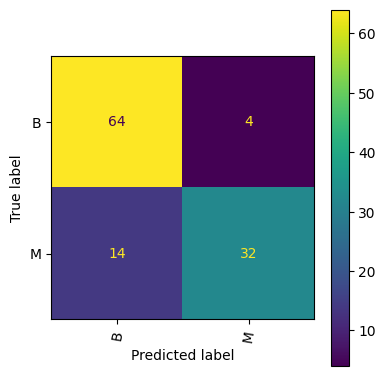

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=reg_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()